<a href="https://colab.research.google.com/github/SohailAliBaig/skincancerdetection/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 252 images belonging to 2 classes.
Class Indices: {'benign': 0, 'malignant': 1}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.4447 - loss: 3.1071
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4688 - loss: 0.8096
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.5365 - loss: 0.6960
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5000 - loss: 0.6948
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5550 - loss: 0.6769
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6875 - loss: 0.5770
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.5699 - loss: 0.7303
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7500 - loss: 0.5605
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.6643 - loss: 0.6066
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7500 - loss: 0.6296
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7179 - loss: 0.6004
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7188 - loss: 0.5289
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7542 - loss: 0.5314
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7143 - loss: 0.6363
Epoch 15/50
7/7 ━━━━━━

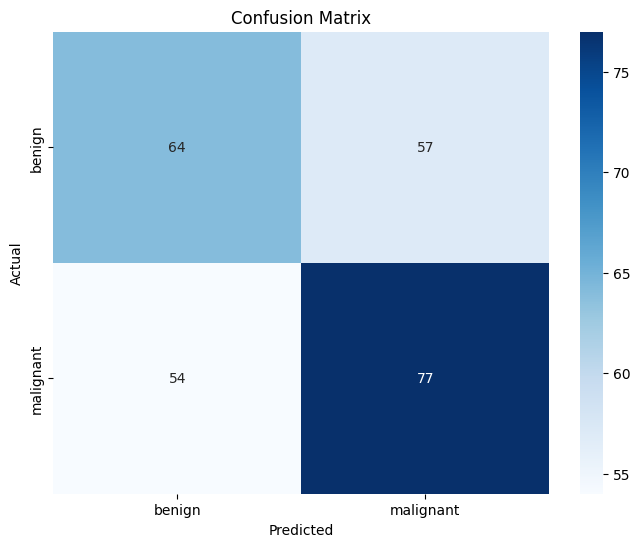

In [ ]:
wimport os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Set the dataset directory path
dataset_dir = '/content/drive/MyDrive/idp_dataset'  # Update with the correct folder path

# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data directly from the folder structure
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, '/content/drive/MyDrive/idp_dataset/idp_dataset/melanoma_cancer_dataset/train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Preview the class indices
print("Class Indices:", train_generator.class_indices)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    callbacks=[early_stopping]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(train_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Generate predictions
predictions = model.predict(train_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = train_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Classification report
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix:\n', conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the model for future use
model.save('skin_cancer_cnn_model.h5')


In [ ]:

import pandas as pd

# Assuming 'true_classes' and 'predicted_classes' are available from your code
# Replace with your actual variables

distribution_df = pd.DataFrame({'True Class': true_classes, 'Predicted Class': predicted_classes})
distribution_table = distribution_df.groupby(['True Class', 'Predicted Class']).size().unstack(fill_value=0)

distribution_table

Predicted Class,0,1
True Class,,
0,64,57
1,54,77


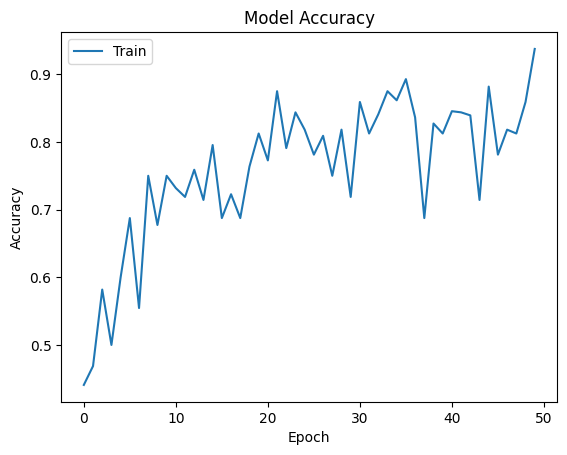

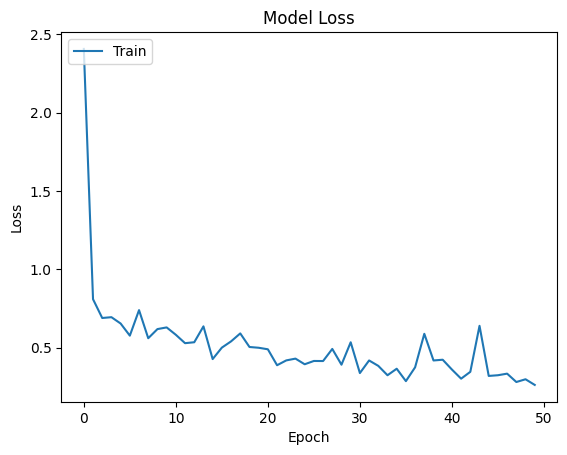

In [ ]:
# prompt: generate the accuracy graph

# Plot the accuracy graph
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])  # Uncomment if you have validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  # Adjust legend if needed
plt.show()

# Plot the loss graph
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])  # Uncomment if you have validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  # Adjust legend if needed
plt.show()

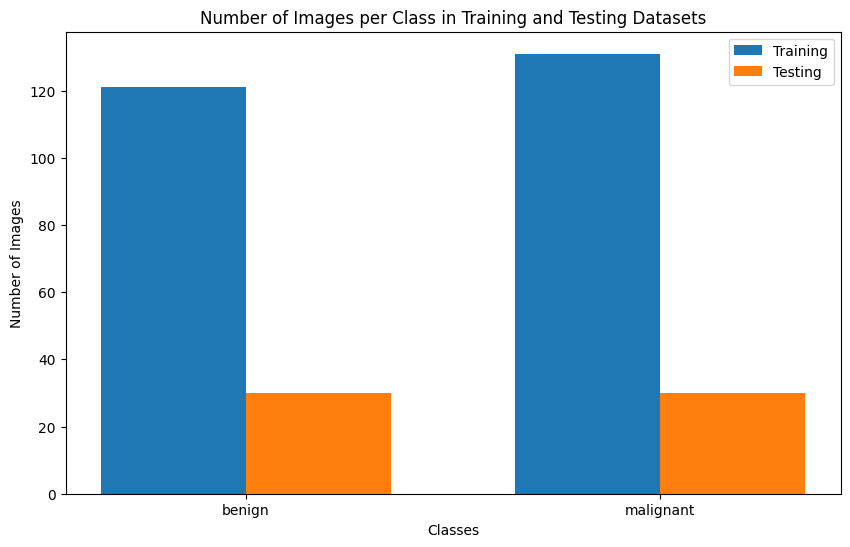

In [ ]:
import os
import matplotlib.pyplot as plt

# Define paths for training and testing datasets
train_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/idp_dataset/idp_dataset/melanoma_cancer_dataset/train')
test_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/idp_dataset/idp_dataset/melanoma_cancer_dataset/test')

# Count images in each class directory for training and testing sets
train_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir)}
test_counts = {class_name: len(os.listdir(os.path.join(test_dir, class_name))) for class_name in os.listdir(test_dir)}

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis positions for each dataset (train and test) for each class
x = np.arange(len(train_counts))

# Bar width
bar_width = 0.35

# Bar plots for training and testing datasets
train_bars = ax.bar(x - bar_width / 2, train_counts.values(), bar_width, label='Training')
test_bars = ax.bar(x + bar_width / 2, test_counts.values(), bar_width, label='Testing')

# Labels and Title
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images per Class in Training and Testing Datasets')
ax.set_xticks(x)
ax.set_xticklabels(train_counts.keys())
ax.legend()

# Display the plot
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


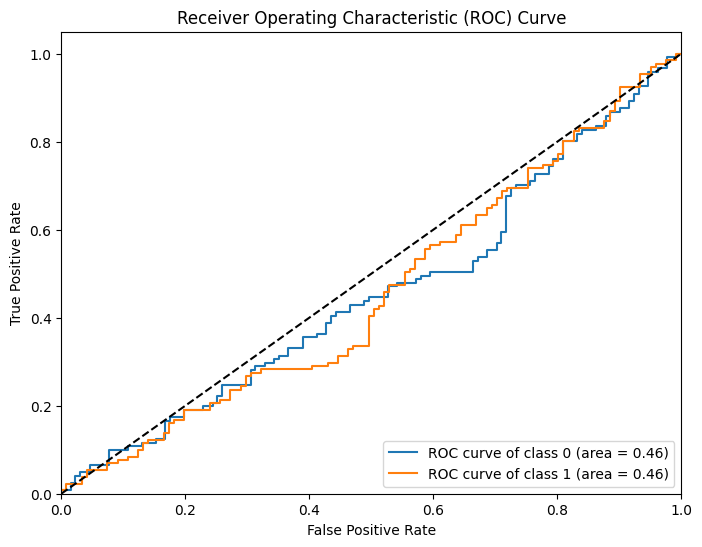

In [ ]:
# prompt: generate roc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming 'true_classes' and 'predictions' are available from your code
# Replace with your actual variables

# Get true classes and predictions from train_generator (or wherever they are defined)
true_classes = train_generator.classes  # This line was missing
predictions = model.predict(train_generator)  # You may need to redefine this

# Binarize the labels for multi-class ROC curve
# If you only have two classes, adjust label_binarize to return a (n_samples, 2) array
y_true = label_binarize(true_classes, classes=list(range(train_generator.num_classes)))
# If y_true has shape (n_samples, 1) after label_binarize, reshape it to (n_samples, 2)
if y_true.shape[1] == 1:
    y_true = np.hstack((1 - y_true, y_true))  # Create a second column for the other class

y_pred = predictions

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = train_generator.num_classes  # Or adjust based on the actual number of classes

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()